In [ ]:
# Базовые библиотеки
import numpy as np
import pandas as pd

# Библиотеки sklearn для данных, моделей, разбиения и метрик
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    RocCurveDisplay,
    PrecisionRecallDisplay,
    brier_score_loss,
)

# Для калибровки
from sklearn.calibration import CalibratedClassifierCV


In [38]:
df = pd.read_csv("S05-hw-dataset.csv")
df.head()


,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [39]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [40]:
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [45]:
df["default"].value_counts(normalize=True)

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

Был произведён EDA, для оценки качества данных. Полный результат приведён в папке report (см report/report.md), более краткий обзор представлен в блоках кода выше. 

На основании произведённого анализа, можно утверждать, что данные пригодны для обучения и не нуждаются в предварительной обработке: датасет содержит записи о 3000 объектах, не содержит явных аномалий, имеет не критичный дисбаланс классов таргета (0.589667/0.410333).

(бомба-пушка-ракета) 

In [41]:
X = df.drop(["client_id", "default"], axis=1)
y = df["default"]

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

print("Размеры выборок:")
print("  train:", X_train.shape)
print("  val:  ", X_val.shape)
print("  test: ", X_test.shape)

print("\nРаспределение классов (train):")
print(y_train.value_counts(normalize=True))

print("\nРаспределение классов (val):")
print(y_val.value_counts(normalize=True))

print("\nРаспределение классов (test):")
print(y_test.value_counts(normalize=True))


Размеры выборок:
  train: (1800, 15)
  val:   (600, 15)
  test:  (600, 15)

Распределение классов (train):
default
0    0.589444
1    0.410556
Name: proportion, dtype: float64

Распределение классов (val):
default
0    0.59
1    0.41
Name: proportion, dtype: float64

Распределение классов (test):
default
0    0.59
1    0.41
Name: proportion, dtype: float64


In [43]:
baselineMF = DummyClassifier(strategy="most_frequent", random_state=42)
baselineMF.fit(X_train, y_train)
baselineSF = DummyClassifier(strategy="stratified", random_state=42)
baselineSF.fit(X_train, y_train)

for mod in [baselineMF, baselineSF]:
    y_val_pred = mod.predict(X_val)
    y_val_proba = mod.predict_proba(X_val)[:, 1]

    print(f"=== Бейзлайн ({mod}, most_frequent) – качество на validation ===")
    print("Accuracy :", accuracy_score(y_val, y_val_pred))
    print("Precision:", precision_score(y_val, y_val_pred, zero_division=0))
    print("Recall   :", recall_score(y_val, y_val_pred, zero_division=0))
    print("F1-score :", f1_score(y_val, y_val_pred, zero_division=0))

    # Для ROC-AUC нам нужны вероятности положительного класса
    try:
        print("ROC-AUC  :", roc_auc_score(y_val, y_val_proba))
    except ValueError as e:
        print("Не удалось посчитать ROC-AUC для бейзлайна:", e)


=== Бейзлайн (DummyClassifier(random_state=42, strategy='most_frequent'), most_frequent) – качество на validation ===
Accuracy : 0.59
Precision: 0.0
Recall   : 0.0
F1-score : 0.0
ROC-AUC  : 0.5
=== Бейзлайн (DummyClassifier(random_state=42, strategy='stratified'), most_frequent) – качество на validation ===
Accuracy : 0.5133333333333333
Precision: 0.4108527131782946
Recall   : 0.43089430894308944
F1-score : 0.42063492063492064
ROC-AUC  : 0.5007578889348215


Бейзлайн модель используется для ряда задач, таких как:
1. ОПРЕДЕЛЕНИЕ МИНИМАЛЬНОГО КАЧЕСТВА
   • Если наша модель не превосходит бейзлайн, то она бесполезна
   • Бейзлайн показывает качество самой простой возможной стратегии

2. ОЦЕНКА СЛОЖНОСТИ ЗАДАЧИ
   • Высокий бейзлайн (например, Accuracy = 95%) означает, что задача простая и возможно не требует ML решения
   • Низкий бейзлайн (Accuracy = 50%) означает, что задача сложная

3. ПРОВЕРКА АДЕКВАТНОСТИ МОДЕЛИ
   • Сравнение с бейзлайном помогает избежать иллюзий
   • "Хорошая" модель должна быть значительно лучше бейзлайна
   • Улучшение должно быть статистически значимым

5. ВАЛИДАЦИЯ ДАННЫХ
   • Если бейзлайн показывает неожиданно высокие/низкие результаты это может указывать на возможные проблемы в данных или постановке задачи


In [46]:
log_reg_pipeline = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "logreg",
            LogisticRegression(
                penalty="l2",
                C=1.0,              # сила регуляризации (чем меньше C, тем сильнее регуляризация)
                solver="liblinear", # надёжный солвер для маленьких датасетов
                random_state=42,
            ),
        ),
    ]
)

# Обучаем pipeline на train
log_reg_pipeline.fit(X_train, y_train)

# Предсказываем на validation
y_val_pred = log_reg_pipeline.predict(X_val)
y_val_proba = log_reg_pipeline.predict_proba(X_val)[:, 1]

print("=== Логистическая регрессия (C=1.0) – качество на validation ===")
print("Accuracy :", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred, zero_division=0))
print("Recall   :", recall_score(y_val, y_val_pred, zero_division=0))
print("F1-score :", f1_score(y_val, y_val_pred, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_val, y_val_proba))

print("\nПодробный отчёт по классам (classification_report):")
print(classification_report(y_val, y_val_pred, target_names=["Не дефолт", "Дефолт"]))


=== Логистическая регрессия (C=1.0) – качество на validation ===
Accuracy : 0.8166666666666667
Precision: 0.8505154639175257
Recall   : 0.6707317073170732
F1-score : 0.75
ROC-AUC  : 0.8746382802811079

Подробный отчёт по классам (classification_report):
              precision    recall  f1-score   support

   Не дефолт       0.80      0.92      0.86       354
      Дефолт       0.85      0.67      0.75       246

    accuracy                           0.82       600
   macro avg       0.83      0.79      0.80       600
weighted avg       0.82      0.82      0.81       600



d:\study\aie_std\pythonPjResh\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


In [47]:
# Настроим сетку по параметру C (сила регуляризации)
param_grid = {
    "logreg__C": [0.01, 0.1, 1.0, 10.0, 100.0],
}

# GridSearchCV будет:
# - внутри делать кросс-валидацию по train
# - выбирать лучший C по заданной метрике (например, ROC-AUC).
grid_search = GridSearchCV(
    estimator=log_reg_pipeline,
    param_grid=param_grid,
    scoring="roc_auc",    # можно поменять на f1, recall и т.д.
    cv=5,
    n_jobs=-1,
    verbose=1,
)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший ROC-AUC (по CV):", grid_search.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Лучшие параметры: {'logreg__C': 0.1}
Лучший ROC-AUC (по CV): 0.8535885101695057


d:\study\aie_std\pythonPjResh\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


In [48]:
# Берём лучшую найденную модель
best_model = grid_search.best_estimator_

# Оцениваем на validation
y_val_pred_best = best_model.predict(X_val)
y_val_proba_best = best_model.predict_proba(X_val)[:, 1]

print("=== Лучшая модель – качество на validation ===")
print("Accuracy :", accuracy_score(y_val, y_val_pred_best))
print("Precision:", precision_score(y_val, y_val_pred_best, zero_division=0))
print("Recall   :", recall_score(y_val, y_val_pred_best, zero_division=0))
print("F1-score :", f1_score(y_val, y_val_pred_best, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_val, y_val_proba_best))

# Оцениваем на test
y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:, 1]

print("\n=== Лучшая модель – качество на test ===")
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_test_pred, zero_division=0))
print("F1-score :", f1_score(y_test, y_test_pred, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_test, y_test_proba))

print("\nClassification report (test):")
print(classification_report(y_test, y_test_pred, target_names=["Не дефолт", "Дефолт"]))

=== Лучшая модель – качество на validation ===
Accuracy : 0.815
Precision: 0.8497409326424871
Recall   : 0.6666666666666666
F1-score : 0.7471526195899773
ROC-AUC  : 0.8746842129438244

=== Лучшая модель – качество на test ===
Accuracy : 0.805
Precision: 0.8056872037914692
Recall   : 0.6910569105691057
F1-score : 0.7439824945295405
ROC-AUC  : 0.8749598089201231

Classification report (test):
              precision    recall  f1-score   support

   Не дефолт       0.80      0.88      0.84       354
      Дефолт       0.81      0.69      0.74       246

    accuracy                           0.81       600
   macro avg       0.81      0.79      0.79       600
weighted avg       0.81      0.81      0.80       600



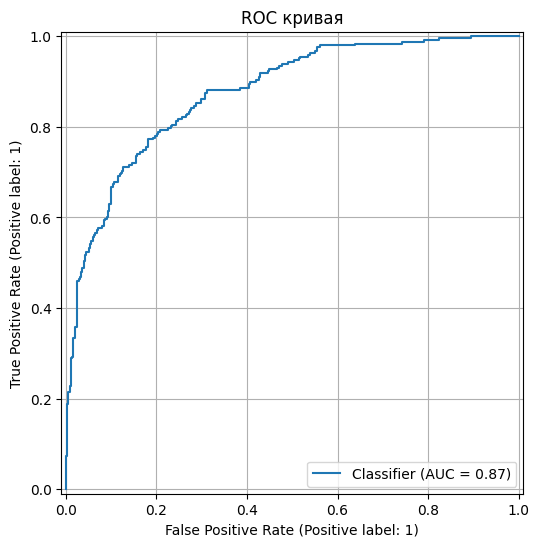

In [61]:
fig, axe = plt.subplots(figsize=(12, 6))
RocCurveDisplay.from_predictions(
    y_test,
    y_test_proba,
    ax=axe
)
axe.set_title("ROC кривая")
axe.grid()

plt.savefig('figures/roc.png')
plt.show()

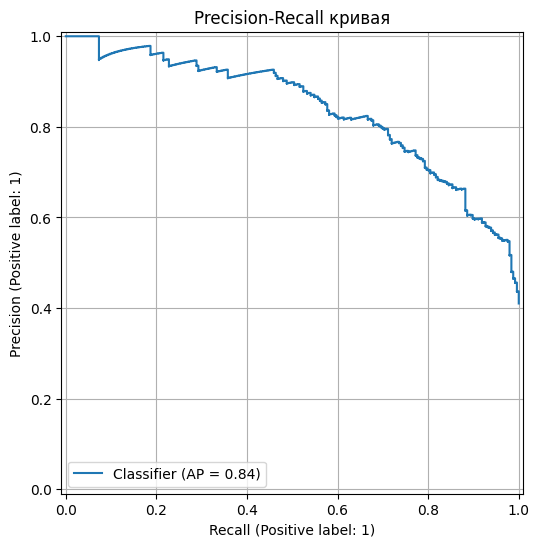

In [62]:
fig, axe = plt.subplots(figsize=(12,6))
PrecisionRecallDisplay.from_predictions(
    y_test,
    y_test_proba,
    ax=axe,
)
axe.set_title("Precision-Recall кривая")
axe.grid()

plt.savefig('figures/precisionRecall.png')
plt.show()

In [64]:
comparison_data = {
    'Метрика': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC'],
    'Бейзлайн (test)': [
        accuracy_score(y_test, baselineMF.predict(X_test)),
        precision_score(y_test, baselineSF.predict(X_test), zero_division=0),
        recall_score(y_test, baselineSF.predict(X_test), zero_division=0),
        f1_score(y_test, baselineSF.predict(X_test), zero_division=0),
        roc_auc_score(y_test, baselineSF.predict_proba(X_test)[:, 1])
    ],
    'Лог.регрессия (test)': [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred, zero_division=0),
        recall_score(y_test, y_test_pred, zero_division=0),
        f1_score(y_test, y_test_pred, zero_division=0),
        roc_auc_score(y_test, y_test_proba)
    ],
    'Улучшение': [
        accuracy_score(y_test, y_test_pred) - accuracy_score(y_test, baselineMF.predict(X_test)),
        precision_score(y_test, y_test_pred, zero_division=0) - precision_score(y_test, baselineSF.predict(X_test), zero_division=0),
        recall_score(y_test, y_test_pred, zero_division=0) - recall_score(y_test, baselineSF.predict(X_test), zero_division=0),
        f1_score(y_test, y_test_pred, zero_division=0) - f1_score(y_test, baselineSF.predict(X_test), zero_division=0),
        roc_auc_score(y_test, y_test_proba) - roc_auc_score(y_test, baselineSF.predict_proba(X_test)[:, 1])
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nСравнительная таблица метрик на тестовой выборке:")
print(comparison_df.to_string(index=False))

comparison_df.to_csv('artifacts/models_comparison.csv', index=False, encoding='utf-8-sig')


Сравнительная таблица метрик на тестовой выборке:
  Метрика  Бейзлайн (test)  Лог.регрессия (test)  Улучшение
 Accuracy         0.590000              0.805000   0.215000
Precision         0.410853              0.805687   0.394834
   Recall         0.430894              0.691057   0.260163
 F1-score         0.420635              0.743982   0.323348
  ROC-AUC         0.500758              0.874960   0.374202


ВЫВОДЫ О ПРОДЕЛАННОЙ РАБОТЕ

1. Различные модели бейзлайна имеют accuracy около 0.55, что лишь немного лучше случайного угадывания. 
Модель бейслайна со стратегией stratified показывает результаты Precision, Recall и F1-score ниже 0.5, что фактически хуже случайного угадывания результатов. 
ROC-AUC = 0.5 подтверждает, что предсказания обоих бейзлан моделей фактически случайны.

2. Бейзлайн служит лишь точкой отсчёта, демонстрируя минимальный уровень качества. 
Логистическая регрессия — это уже осмысленная модель, которая выявляет закономерности в данных и делает полезные для практики прогнозы. 
Разница в качестве — принципиальная: от полной непригодности (бейзлайн) до хорошей применимости (логистическая регрессия).
Логистическая регрессия является разумным выбором для данной задачи, так как значительно улучшает все метрики по сравнению с бейзлайном и демонстрирует высокое качество классификации.

3. Все метрики качества модели логистической регрессии заметно улучшились, что можно наблюдать в таблице сравнения итоговой модели с бейзлайном (`artifacts/models_comparison.csv`). На основании сравнения этих метрик можно сделать следующий вывод о модели: ну норм наверное, с пивом потянет